In [0]:
import numpy as np

In [0]:
train=np.load('/content/drive/My Drive/train.npy')

In [0]:
y=np.load('/content/drive/My Drive/yt.npy')

In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(train,y,test_size = 0.25,random_state=777,shuffle=True)

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [40]:
inputs = Input(shape=(8000,1))
cnnl = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
cnnl = MaxPooling1D(3)(cnnl)
cnnl = Dropout(0.3)(cnnl)
cnnl = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(cnnl)
cnnl = MaxPooling1D(3)(cnnl)
cnnl = Dropout(0.3)(cnnl)
cnnl = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(cnnl)
cnnl = MaxPooling1D(3)(cnnl)
cnnl = Dropout(0.3)(cnnl)
cnnl = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(cnnl)
cnnl = MaxPooling1D(3)(cnnl)
cnnl = Dropout(0.3)(cnnl)
cnnl = Flatten()(cnnl)
cnnl = Dense(256, activation='relu')(cnnl)
cnnl = Dropout(0.3)(cnnl)
cnnl = Dense(128, activation='relu')(cnnl)
cnnl = Dropout(0.3)(cnnl)
target = Dense(30, activation='softmax')(cnnl)
model = Model(inputs, target)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('speech_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [43]:
history=model.fit(x_tr, y_tr ,epochs=20, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 43689 samples, validate on 14563 samples
Epoch 1/20
43689/43689 [==============================] - 379s 9ms/step - loss: 2.9732 - acc: 0.1370 - val_loss: 2.3292 - val_acc: 0.2941

Epoch 00001: val_acc improved from -inf to 0.29410, saving model to speech_model.h5
Epoch 2/20
43689/43689 [==============================] - 375s 9ms/step - loss: 2.0180 - acc: 0.3690 - val_loss: 1.5249 - val_acc: 0.5485

Epoch 00002: val_acc improved from 0.29410 to 0.54851, saving model to speech_model.h5
Epoch 3/20
43689/43689 [==============================] - 375s 9ms/step - loss: 1.5815 - acc: 0.5094 - val_loss: 1.2656 - val_acc: 0.6260

Epoch 00003: val_acc improved from 0.54851 to 0.62604, saving model to speech_model.h5
Epoch 4/20
43689/43689 [==============================] - 378s 9ms/step - loss: 1.3980 - acc: 0.5670 - val_loss: 1.1405 - val_acc: 0.6648

Epoch 00004: val_acc improved from 0.62604 to 0.66477, saving model to speech_model.h5
Epoch 5/20
43689/43689 [=========================

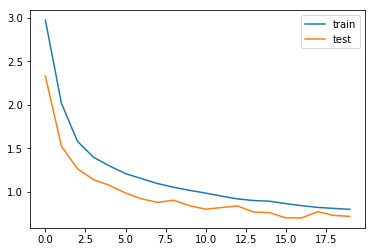

In [44]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
from keras.models import load_model
model=load_model('speech_model.h5')